In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#https://isquared.digital/visualizations/2020-06-26-julia-set/ 

# ignore warnings
import warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl 
#https://holypython.com/how-to-save-matplotlib-animations-the-ultimate-guide/
mpl.rcParams['animation.ffmpeg_path'] = r'C:\ffmpeg\bin\\ffmpeg.exe'

In [8]:
def julia_quadratic(zx, zy, cx, cy, threshold):
    """Calculates whether the number z[0] = zx + i*zy with a constant c = x + i*y belongs
    to the Julia set. In order to belong, the sequence z[n + 1] = z[n]**2 + c, 
    must not diverge after 'threshold' number of steps. The sequence diverges
    if the absolute value of z[n+1] is greater than 4.
    
    :param float zx: the x component of z[0]
    :param float zy: the y component of z[0]
    :param float cx: the x component of the constant c
    :param float cy: the y component of the constant c
    :param int threshold: the number of iterations to considered it converged
    """
    # initial conditions
    z = complex(zx, zy)
    c = complex(cx, cy)
    
    for i in range(threshold):
        z = z**2 + c
        if abs(z) > 4.:  # it diverged
            return i
        
    return threshold - 1  # it didn't diverge

In [3]:
x_start, y_start = -2, -2  # an interesting region starts here
width, height = 4, 4  # for 3 units to the left and to the right
density_per_unit = 200  # how many pixles per unit

re = np.linspace(x_start, x_start + width, width * density_per_unit )  # real axis
im = np.linspace(y_start, y_start + height, height * density_per_unit)  # imaginary axis

X = np.empty((len(re), len(im)))  # the initial array-like image

In [4]:
threshold = 20  # max allowed iterations

# we represent c as c = r*cos(a) + i*r*sin(a) = r*e^{i*a}
r = 0.7885
a = 2 * np.pi / 4.
cx, cy = r * np.cos(a), r * np.sin(a)

# fill-in the image with the number of interations
for i in range(len(re)):
    for j in range(len(im)):
        X[i, j] = julia_quadratic(zx=re[i], zy=im[j], cx=cx, cy=cy, threshold=threshold)

Text(0.15, 0.08, 'by Javier Aguilar Martín')

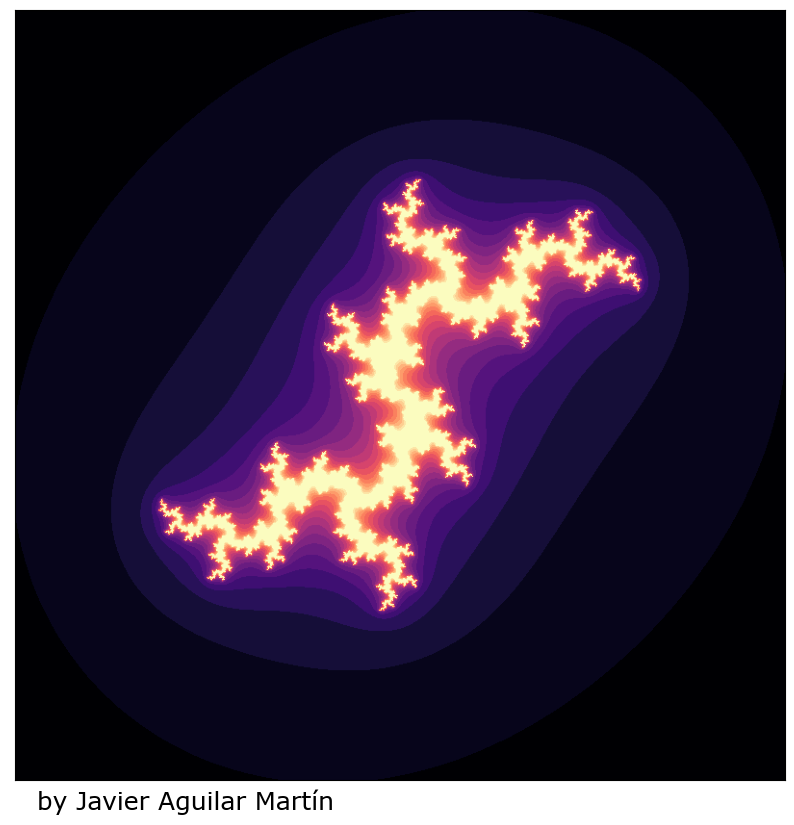

In [5]:
fig = plt.figure(figsize=(10, 10))

# formatting options: remove ticks
ax = plt.axes()
ax.set_xticks([], [])
ax.set_yticks([], [])

ax.imshow(X.T, interpolation="hanning", cmap='magma')
plt.gcf().text(0.15, 0.08, 'by Javier Aguilar Martín', fontsize=18, fontfamily='Verdana')
#plt.savefig('julia_Set.png', dpi=300, bbox_inches='tight')


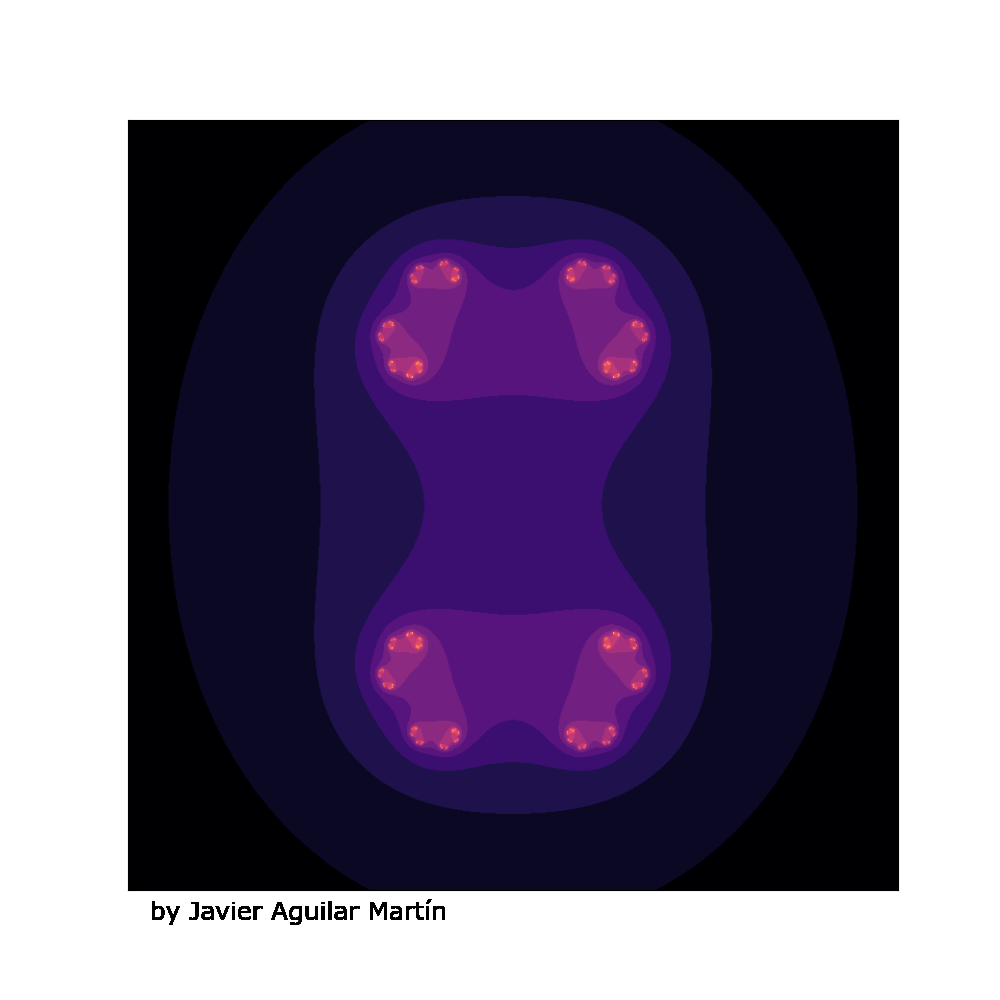

In [11]:
#%matplotlib ipympl
#https://stackoverflow.com/questions/64613706/animate-update-a-matplotlib-plot-in-vs-code-notebook
#plt.rcParams["animation.html"] = "jshtml"

frames = 100  # number of frames in the animation
as_mp4 = True

# we represent c as c = r*cos(a) + i*r*sin(a) = r*e^{i*a}
r = 0.7885
a = np.linspace(0, 2*np.pi, frames)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes()

def animate(i):
    # clear axes object
    ax.clear()
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    
    X = np.empty((len(re), len(im)))  # the initial array-like image
    cx, cy = r * np.cos(a[i]), r * np.sin(a[i])
    
    # fill-in the image with the number of interations
    for i in range(len(re)):
        for j in range(len(im)):
            X[i, j] = julia_quadratic(zx=re[i], zy=im[j], cx=cx, cy=cy, threshold=threshold)
    
    img = ax.imshow(X.T, interpolation="hamming", cmap='magma')
    plt.gcf().text(0.15, 0.08, 'by Javier Aguilar Martín', fontsize=18, fontfamily='Verdana')
    return [img]

# call the animator	 
anim = animation.FuncAnimation(fig, animate, frames=frames, interval=50, blit=True)

if as_mp4:
    # Set up formatting for the movie files
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
    # save the animation as a mp4 file 
    anim.save('julia_set.mp4', writer=writer)   
else:
    anim.save('julia_set.gif', writer='imagemagick')  